# Phân tích giỏ hàng bằng thuật toán Apriori

## I. Giới thiệu 


## II. Dữ liệu

Đồ án sử dụng dataset có tên "The Instacart Online Grocery Shopping Dataset 2017", được đăng tải bởi chính Instacart trên Kaggle [1]. Dataset bao gồm hơn 3 triệu đơn hàng từ hơn 200.000 khách hàng đã đặt thông qua app và website của Instacart. 
Dataset gồm có 7 file dữ liệu riêng lẻ: 
1. aisles.csv (aisle_id, aisle)
2. departments.csv (department_id, department)
3. order_products_prior.csv (order_id, product_id, add_to_cart_order, reordered)
4. order_products_train.csv (order_id, product_id, add_to_cart_order, reordered)
5. orders.csv (order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order)
6. products.csv (product_id, product_name, aisles_id, department_id)
7. sample_submission.csv (order_id, products)

Trong phạm vi đồ án, có 3 file dữ liệu sẽ được sử dụng, liên kết với nhau là "order_products_train", "orders", và "products". 

## III. Thư viện python

In [5]:
# Những thư viện cần thiết 
import pandas as pd # xử lý dữ liệu.
import numpy as np # hỗ trợ tính toán. 
import matplotlib.pyplot as plt # trực quan hóa dữ liệu.
from mlxtend.preprocessing import TransactionEncoder # tiền xử lý dữ liệu để phân tích giỏ hàng.
from mlxtend.frequent_patterns import apriori, association_rules # thuật toán Apriori, và luật liên kết để phân tích giỏ hàng.

Trích dẫn nguồn dữ liệu: https://www.kaggle.com/c/instacart-market-basket-analysis

## IV. Tiến hành phân tích

### 1. Khám phá dữ liệu - Exploring data in Python

In [6]:
# Đọc file dữ liệu thứ 1: order_products_train.
order_product = pd.read_csv(r'C:\Users\Oanh Le\Google Drive\My Drive\instacart-market-basket-analysis\order_products__prior.csv')

# In DataFrame order_product.
order_product

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


File dữ liệu order_products_train gồm có order_id và product_id giúp liên kết với 2 bảng orders và products để tạo thành một DataFrame mới. 

In [7]:
# Đọc file dữ liệu thứ 2: orders. 
orders = pd.read_csv(r'C:\Users\Oanh Le\Google Drive\My Drive\instacart-market-basket-analysis\orders.csv')

# In DataFrame orders.
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


File dữ liệu orders gồm 3.421.083 triệu đơn hàng đã được đặt. 

In [8]:
# Đọc file dữ liệu thứ 3: products. 
products = pd.read_csv(r'C:\Users\Oanh Le\Google Drive\My Drive\instacart-market-basket-analysis\products.csv')

# In DataFrame products.
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


File dữ liệu products gồm 49.688 sản phẩm đã được mua. 

In [9]:
# INNER JOIN 3 DataFrame với nhau.
instacart_transaction = order_product.merge(orders, on = 'order_id').merge(products, on = 'product_id')

# Xuất file dữ liệu vừa INNER J"instacart_transaction.csv".
instacart_transaction.to_csv(r'C:\Users\Oanh Le\Google Drive\My Drive\instacart-market-basket-analysis\instacart_transaction.csv', index=False, header=True)

# In file vừa tạo. 
instacart_transaction

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3265099,43492,3,0,111311,prior,2,3,10,5.0,Gourmet Burger Seasoning,104,13
32434485,3361945,43492,19,0,142932,prior,25,3,10,5.0,Gourmet Burger Seasoning,104,13
32434486,3267201,33097,2,0,183867,prior,19,3,18,3.0,Piquillo & Jalapeno Bruschetta,81,15
32434487,3393151,38977,32,0,79056,prior,1,4,13,NaN,Original Jerky,100,21


In [19]:
# Tải file dữ liệu vừa mới xuất và chỉ lấy những cột cần thiết để chuẩn bị phân tích. 
# Chỉ lấy những cột sau.
col_insta_trans = ['order_id', 'product_id', 'user_id', 'product_name']

# Đọc file dữ liệu vừa mới xuất. 
instacart_transaction = pd.read_csv(r'C:\Users\Oanh Le\Google Drive\My Drive\instacart-market-basket-analysis\instacart_transaction.csv', index_col=False, usecols=col_insta_trans)

# In DataFrame hoàn chỉnh. 
instacart_transaction

,order_id,product_id,user_id,product_name
0,2,33120,202279,Organic Egg Whites
1,26,33120,153404,Organic Egg Whites
2,120,33120,23750,Organic Egg Whites
3,327,33120,58707,Organic Egg Whites
4,390,33120,166654,Organic Egg Whites
...,...,...,...,...
32434484,3265099,43492,111311,Gourmet Burger Seasoning
32434485,3361945,43492,142932,Gourmet Burger Seasoning
32434486,3267201,33097,183867,Piquillo & Jalapeno Bruschetta
32434487,3393151,38977,79056,Original Jerky


In [20]:
# Thông tin sơ lược về DataFrame.
instacart_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      int64 
 1   product_id    int64 
 2   user_id       int64 
 3   product_name  object
dtypes: int64(3), object(1)
memory usage: 989.8+ MB


In [21]:
# Kiểm tra có trị null hay không 
instacart_transaction.isna().sum()

order_id        0
product_id      0
user_id         0
product_name    0
dtype: int64

### 2. Initial exploratory analysis

In [22]:
# Số lượng đơn hàng mà mỗi người dùng trong hơn 200.000 người đã đặt qua app và website Instacart 
order_count = instacart_transaction.groupby('user_id')['order_id'].count().reset_index(name='count')
order_count

,user_id,count
0,1,59
1,2,195
2,3,88
3,4,18
4,5,37
...,...,...
206204,206205,32
206205,206206,285
206206,206207,223
206207,206208,677


In [23]:
# Mỗi sản phẩm có bao nhiêu đơn đặt hàng
product_count = instacart_transaction.groupby('product_id', as_index=False)['order_id'].count()
product_count.rename(columns = {'order_id':'count'},inplace=True)
product_count

,product_id,count
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15
...,...,...
49672,49684,9
49673,49685,49
49674,49686,120
49675,49687,13


In [24]:
# # Top 10 sản phẩm (product_name) được mua nhiều nhất. 
top10_count = instacart_transaction[['order_id','product_name']].groupby('product_name',as_index=False)['order_id'].count(
    ).sort_values(by='order_id',ascending=False)
top10_count.rename(columns = {'order_id':'count'},inplace=True)
top10_count.head(10)

,product_name,count
3676,Banana,472565
3471,Bag of Organic Bananas,379450
31920,Organic Strawberries,264683
28840,Organic Baby Spinach,241921
30297,Organic Hass Avocado,213584
28804,Organic Avocado,176815
22413,Large Lemon,152657
42904,Strawberries,142951
23420,Limes,140627
32478,Organic Whole Milk,137905


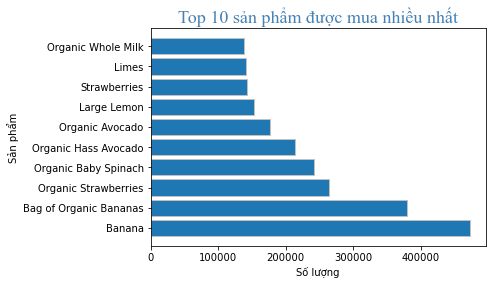

In [25]:
y_axis = top10_count['product_name'].head(10)
x_axis = top10_count['count'].head(10)

plt.barh(y_axis,x_axis, edgecolor='Silver')

plt.title('Top 10 sản phẩm được mua nhiều nhất', color='steelblue',
fontfamily='times new roman',fontsize=18)
plt.ylabel('Sản phẩm')
plt.xlabel('Số lượng')

plt.show()

In [26]:
# Số lượng trung bình sản phẩm được bán ra.
purchase_count = instacart_transaction.groupby('order_id')['product_name'].count()
df = pd.DataFrame(purchase_count)
df.mean(axis=0)

product_name    10.088883
dtype: float64

### 3. Chuẩn bị dữ liệu để phân tích giỏ hàng

In [ ]:
# Bước đầu chuyển từ DataFrame sang transaction data để phân tích giỏ hàng 
# Đếm unique order IDs.
order_id = instacart_transaction['order_id'].unique()

# Tạo danh sách để chuyển DataFrame thành transaction data 
transaction = [list(instacart_transaction[instacart_transaction['order_id'] == u].product_name) for u in order_id]

"""
Danh sách dưới đây là gồm những đơn hàng (order_id) unique
Mỗi danh sách được ví như một giỏ hàng của khách hàng đã mua 
Và mỗi danh sách được phân cách bằng dấu []
"""
# In danh sách vừa tạo. 
transaction

In [ ]:
"""
Dưới đây là danh sách (giỏ hàng) gồm những sản phẩm (product_name) 
mà khách hàng hay mua cùng với nhau. 
"""
transaction[0] 

In [ ]:
"""
Tiếp tục danh sách vừa tạo sang dạng onehot encoding để tiến hành phân tích giỏ hàng 
Mỗi cột sẽ là một trong 49,653 sản phẩm (product_name)
Với giá trị False ~ (0): không xuất hiện trong giỏ hàng 
            True  ~ (1): có xuất hiện trong giỏ hàng 
            * Giỏ hàng ở đây chỉ 1 giỏ hàng của 1 khách hàng (unique).
"""
# Instantiate transaction encoder.
encoder = TransactionEncoder()
# One-hot encode instacart_transaction.
onehot = encoder.fit(transaction).transform(transaction)
# Sử dụng product_name là cột headers.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
# Print onehot header.
onehot

In [ ]:
onehot.mean()

In [ ]:
# Tính toán giá trị support. 
support_bananas_bags = np.logical_and(onehot['Banana'], onehot['Bag of Organic Bananas']).mean()
support_bananas = onehot['Bananas'].mean()
support_bags = onehot['Bag of Organic Bananas'].mean()
# Tính toán giá trị confidence and lift.
confidence = support_bananas_bags / support_bananas
lift = support_bananas_bags / (support_bananas * support_bags)
# In kết quả.
print(' Giá trị support cho sản phẩm "Bananas" là: %f\n' %support_bananas, 'Giá trị support của sản phẩm "Bag of Organic Bananas" là: %f\n' %support_bags, 'Giá trị confidence là: %f\n' %confidence, 'Giá trị lift là: %f\n' %lift)

Ý nghĩa của các chỉ số này: 

In [ ]:
# Tính toán chỉ số leverage. 
# Tính toán trước chỉ số support của Bananas và Limes.
support_bananas_limes = np.logical_and(onehot['Bananas'], onehot['Limes']).mean()
# Tính toán chỉ số của Bananas. 
support_bananas = onehot['Bananas'].mean()
# Tính toán chỉ số support của Limes. 
support_limes = onehot['Limes'].mean()
# Tính toán chỉ số leverage
leverage = support_bananas_limes - support_limes * support_bananas
print('Giá trị leverage là: %f' %leverage)

In [ ]:
# Tính toán chỉ số conviction. 
# Tính toán chỉ số support cho sản phẩm Bananas, Bags of Organic Bananas, và Limes. 
#support_bananas_limes = np.logical_and(onehot['Bananas'], onehot['Limes']).mean()
# Tính toán chỉ số support cho !Bags of Organic Bananas.
#support_not_bags = 1.0 - onehot['Bag of Organic Bananas'].mean()
# Tính toán chỉ số support của Bananas và !Bags of Organic Bananas
#support_bana_not_bag = support_bananas - support

In [ ]:
# Tính toán frequent itemsets
frequent_itemsets = apriori(onehot, use_colnames = True, min_support = 0.01)
# In tất cả số itemsets
print(len(frequent_itemsets))

In [ ]:
frequent_itemsets

# Pruning - loại bỏ những weak asscociation rules 

In [ ]:
# Tính toán association rules 
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0)
rules

In [ ]:
rules.columns

In [ ]:
rules[['antecedents', 'consequents']]

In [ ]:
# Lọc theo từng chỉ số khác 
#targeted_rules = rules[rules['consequents'] == {}]

In [ ]:
# Tính toán Zhang's rule
rules['zhang'] = zhangs_rule(rules)
# In rules mà là dissociation 
rules[rules['zhang'] < 0][['antecedents', 'consequents']]

# Tài liệu tham khảo
[1]. https://www.kaggle.com/c/instacart-market-basket-analysis
* https://pbpython.com/market-basket-analysis.html
* https://www.hackerearth.com/blog/developers/beginners-tutorial-apriori-algorithm-data-mining-r-implementation/
* https://www.datacamp.com/community/tutorials/market-basket-analysis-r
* https://www.kdnuggets.com/2019/12/market-basket-analysis.html
* https://www2.deloitte.com/cz/en/pages/deloitte-analytics/solutions/market-basket-analysis.html
* https://www.analyticsvidhya.com/blog/2021/10/end-to-end-introduction-to-market-basket-analysis-in-r/
* https://www.youtube.com/watch?v=aslTl6i-hpQ
* https://www.youtube.com/watch?v=guVvtZ7ZClw
* https://www.youtube.com/watch?v=SVM_pX0oTU8
* https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
* https://ccc.inaoep.mx/~villasen/bib/Computing%20the%20minimum-support%20for%20mining%20frequent.pdf
* https://www.sciencedirect.com/science/article/pii/S0888613X04001392
* https://www.sciencedirect.com/science/article/pii/S2314728816300460
